# Trabalho A4 de Análise de Negócios com Uso de Big Data - Turma de Terça
### Integrantes do grupo:
- Karen Tomaz
- Laila Fonseca
- Lucas Andre

# Link do dataset escolhido: https://www.kaggle.com/datasets/sujaykapadnis/hollywood-age-gap
### Neste relatório, realizamos uma análise de um conjunto de dados sobre a diferença de idade entre atores e atrizes de Hollywood, aplicando várias etapas de tratamento e análise dos dados. Pegamos um dataset sobre a 'diferença de idade dos atores de hollywood' para analisar os dados e realizar o que se pede no enunciado.

# ---------------------------------------------------------------------------------------------------------------

# Inicio do trabalho 
### Bom, iniciamos o trabalho importando o nosso dataset e ultizando a biblioteca pandas, como foi pedido. E criamos o dataframe chamado "tb_movies", correspondendo a identificação da tabela, para o dataset. 

In [1]:
# Utilizamos o "tb_movies" como identificador da tabela, para o dataset 

#importando pandas:
import pandas as pd

#importando base de dados:
tb_movies = pd.read_csv("movies.csv")
tb_movies

,Movie Name,Release Year,Director,Age Difference,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age
0,Harold and Maude,1971,Hal Ashby,52,Bud Cort,man,1948-03-29,23,Ruth Gordon,woman,1896-10-30,75
1,Venus,2006,Roger Michell,50,Peter O'Toole,man,1932-08-02,74,Jodie Whittaker,woman,1982-06-03,24
2,The Quiet American,2002,Phillip Noyce,49,Michael Caine,man,1933-03-14,69,Do Thi Hai Yen,woman,1982-10-01,20
3,The Big Lebowski,1998,Joel Coen,45,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23
4,Beginners,2010,Mike Mills,43,Christopher Plummer,man,1929-12-13,81,Goran Visnjic,man,1972-09-09,38
...,...,...,...,...,...,...,...,...,...,...,...,...
1170,The Hunger Games: Catching Fire,2013,Francis Lawrence,0,Liam Hemsworth,man,1990-01-13,23,Jennifer Lawrence,woman,1990-08-15,23
1171,The Lake House,2006,Alejandro Agresti,0,Keanu Reeves,man,1964-09-02,42,Sandra Bullock,woman,1964-07-26,42
1172,Tolkien,2019,Dome Karukoski,0,Nicholas Hoult,man,1989-12-07,30,Lily Collins,woman,1989-03-18,30
1173,Transformers,2007,Michael Bay,0,Shia LaBeouf,man,1986-06-11,21,Megan Fox,woman,1986-05-16,21


# Tradução do Dataset:
### Primeiramente, traduzimos as colunas do dataset para tornar os dados mais compreensíveis e facilitar a análise feita por nós no trabalho. 

In [2]:
#traduzindo colunas
traducao_colunas = {
    'Movie Name': 'Título',
    'Release Year': 'Ano Lançamento',
    'Director': 'Diretor',
    'Age Difference': 'Diferença de Idade',
    'Actor 1 Name': 'Ator 1',
    'Actor 1 Gender': 'Gênero Ator 1',
    'Actor 1 Birthdate': 'Nascimento Ator 1',
    'Actor 1 Age': 'Idade Ator 1',
    'Actor 2 Name': 'Ator 2',
    'Actor 2 Gender': 'Gênero Ator 2',
    'Actor 2 Birthdate': 'Nascimento Ator 2',
    'Actor 2 Age': 'Idade Ator 2',
}

tb_movies = tb_movies.rename(columns=traducao_colunas)
tb_movies

,Título,Ano Lançamento,Diretor,Diferença de Idade,Ator 1,Gênero Ator 1,Nascimento Ator 1,Idade Ator 1,Ator 2,Gênero Ator 2,Nascimento Ator 2,Idade Ator 2
0,Harold and Maude,1971,Hal Ashby,52,Bud Cort,man,1948-03-29,23,Ruth Gordon,woman,1896-10-30,75
1,Venus,2006,Roger Michell,50,Peter O'Toole,man,1932-08-02,74,Jodie Whittaker,woman,1982-06-03,24
2,The Quiet American,2002,Phillip Noyce,49,Michael Caine,man,1933-03-14,69,Do Thi Hai Yen,woman,1982-10-01,20
3,The Big Lebowski,1998,Joel Coen,45,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23
4,Beginners,2010,Mike Mills,43,Christopher Plummer,man,1929-12-13,81,Goran Visnjic,man,1972-09-09,38
...,...,...,...,...,...,...,...,...,...,...,...,...
1170,The Hunger Games: Catching Fire,2013,Francis Lawrence,0,Liam Hemsworth,man,1990-01-13,23,Jennifer Lawrence,woman,1990-08-15,23
1171,The Lake House,2006,Alejandro Agresti,0,Keanu Reeves,man,1964-09-02,42,Sandra Bullock,woman,1964-07-26,42
1172,Tolkien,2019,Dome Karukoski,0,Nicholas Hoult,man,1989-12-07,30,Lily Collins,woman,1989-03-18,30
1173,Transformers,2007,Michael Bay,0,Shia LaBeouf,man,1986-06-11,21,Megan Fox,woman,1986-05-16,21


# ---------------------------------------------------------------------------------------------------------------

# Análise da distribuição das amostras e Cálculo de Indicadores
### Os indicadores utilizados foram os gêneros e as idades dos atores e atrizes. Aqui fizemos dois tópicos em um só código, pois como podemos ver, conseguimos fazer o cálculo dos indicadores usando o gênero e a idade dos atores e atrizes da tabela e fizemos a distribuição das amostras realizando a média de idade entre os atores e atrizes. 

In [12]:
#Filtrando dados de atores e atrizes
atores = tb_movies[tb_movies['Gênero Ator 1'] == 'man']
atrizes = tb_movies[tb_movies['Gênero Ator 2'] == 'woman']

#Função para calcular porcentagem
def calcular_porcentagem(total, subtotal):
    return (subtotal / total) * 100

#Calculando o número total de atores e atrizes em cada gênero
total_atores = len(atores)
total_atrizes = len(atrizes)

#Calculando a porcentagem de atores menores de 18 anos
atores_menores_de_18 = atores[atores['Idade Ator 1'] < 18]
porcentagem_atores_menores_de_18 = calcular_porcentagem(total_atores, len(atores_menores_de_18))

#Calculando a porcentagem de atores maiores de 18 anos
atores_maiores_de_18 = atores[(atores['Idade Ator 1'] >= 18) & (atores['Idade Ator 1'] <= 60)]
porcentagem_atores_maiores_de_18 = calcular_porcentagem(total_atores, len(atores_maiores_de_18))

#Calculando a porcentagem de atores acima de 60 anos
atores_acima_de_60 = atores[atores['Idade Ator 1'] > 60]
porcentagem_atores_acima_de_60 = calcular_porcentagem(total_atores, len(atores_acima_de_60))

#Calculando a porcentagem equivalente para atrizes
porcentagem_atrizes_menores_de_18 = calcular_porcentagem(total_atrizes, len(atrizes[atrizes['Idade Ator 2'] < 18]))
porcentagem_atrizes_maiores_de_18 = calcular_porcentagem(total_atrizes, len(atrizes[(atrizes['Idade Ator 2'] >= 18) & (atrizes['Idade Ator 2'] <= 60)]))
porcentagem_atrizes_acima_de_60 = calcular_porcentagem(total_atrizes, len(atrizes[atrizes['Idade Ator 2'] > 60]))
#Imprimindo os resultados
print("Porcentagem de atores e atrizes com base na faixa etária:")
print(f"Atores menores de 18 anos: {porcentagem_atores_menores_de_18:.2f}%")
print(f"Atores maiores de 18 anos: {porcentagem_atores_maiores_de_18:.2f}%")
print(f"Atores acima de 60 anos: {porcentagem_atores_acima_de_60:.2f}%")
print(f"Atrizes menores de 18 anos: {porcentagem_atrizes_menores_de_18:.2f}%")
print(f"Atrizes maiores de 18 anos: {porcentagem_atrizes_maiores_de_18:.2f}%")
print(f"Atrizes acima de 60 anos: {porcentagem_atrizes_acima_de_60:.2f}%")

Porcentagem de atores e atrizes com base na faixa etária:
Atores menores de 18 anos: 0.35%
Atores maiores de 18 anos: 95.77%
Atores acima de 60 anos: 3.88%
Atrizes menores de 18 anos: 0.78%
Atrizes maiores de 18 anos: 98.36%
Atrizes acima de 60 anos: 0.86%


# ---------------------------------------------------------------------------------------------------------------

### Nessa parte fizemos a deleção, para um melhor aproveitamento dos dados que realmente são necessários para a nossa análise. 

In [13]:
#Excluindo 3 colunas para melhor aproveitamento dos dados necessários

tb_movies.drop("Título", axis = 1, inplace=True)
tb_movies.drop("Ano Lançamento", axis = 1, inplace=True)
tb_movies.drop("Diretor", axis = 1, inplace=True)

In [15]:
tb_movies

,Diferença de Idade,Ator 1,Gênero Ator 1,Nascimento Ator 1,Idade Ator 1,Ator 2,Gênero Ator 2,Nascimento Ator 2,Idade Ator 2
0,52,Bud Cort,man,1948-03-29,23,Ruth Gordon,woman,1896-10-30,75
1,50,Peter O'Toole,man,1932-08-02,74,Jodie Whittaker,woman,1982-06-03,24
2,49,Michael Caine,man,1933-03-14,69,Do Thi Hai Yen,woman,1982-10-01,20
3,45,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23
4,43,Christopher Plummer,man,1929-12-13,81,Goran Visnjic,man,1972-09-09,38
...,...,...,...,...,...,...,...,...,...
1170,0,Liam Hemsworth,man,1990-01-13,23,Jennifer Lawrence,woman,1990-08-15,23
1171,0,Keanu Reeves,man,1964-09-02,42,Sandra Bullock,woman,1964-07-26,42
1172,0,Nicholas Hoult,man,1989-12-07,30,Lily Collins,woman,1989-03-18,30
1173,0,Shia LaBeouf,man,1986-06-11,21,Megan Fox,woman,1986-05-16,21


# ---------------------------------------------------------------------------------------------------------------

### Já aqui fizemos a inserção de determinadas colunas, para filtrar e fazer a análise dos dados, com os estudos necessários e tendo as informações relevantes do dataset. 

In [ ]:
#Adicionando 6 colunas para realizar os estudos necessários

tb_movies["Atores menores de 18 anos"] = porcentagem_atores_menores_de_18
tb_movies["Atores maiores de 18 anos"] = porcentagem_atores_maiores_de_18
tb_movies["Atores acima de 60 anos"] = porcentagem_atores_acima_de_60
tb_movies["Atrizes menores de 18 anos"] = porcentagem_atrizes_menores_de_18
tb_movies["Atrizes maiores de 18 anos"] = porcentagem_atrizes_maiores_de_18
tb_movies["Atrizes acima de 60 anos"] = porcentagem_atrizes_acima_de_60

In [59]:
tb_movies

,Diferença de Idade,Ator 1,Gênero Ator 1,Nascimento Ator 1,Idade Ator 1,Ator 2,Gênero Ator 2,Nascimento Ator 2,Idade Ator 2,Atores menores de 18 anos,Atores maiores de 18 anos,Atores acima de 60 anos,Atrizes menores de 18 anos,Atrizes maiores de 18 anos,Atrizes acima de 60 anos
0,52,Bud Cort,man,1948-03-29,23,Ruth Gordon,woman,1896-10-30,75,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558
1,50,Peter O'Toole,man,1932-08-02,74,Jodie Whittaker,woman,1982-06-03,24,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558
2,49,Michael Caine,man,1933-03-14,69,Do Thi Hai Yen,woman,1982-10-01,20,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558
3,45,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558
4,43,Christopher Plummer,man,1929-12-13,81,Goran Visnjic,man,1972-09-09,38,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,0,Liam Hemsworth,man,1990-01-13,23,Jennifer Lawrence,woman,1990-08-15,23,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558
1171,0,Keanu Reeves,man,1964-09-02,42,Sandra Bullock,woman,1964-07-26,42,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558
1172,0,Nicholas Hoult,man,1989-12-07,30,Lily Collins,woman,1989-03-18,30,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558
1173,0,Shia LaBeouf,man,1986-06-11,21,Megan Fox,woman,1986-05-16,21,0.345125,95.772217,3.882657,0.777202,98.35924,0.863558


# ---------------------------------------------------------------------------------------------------------------

# Código para a montagem do gráfico
### Formação do código para o gráfico de pizza. Utilizamos o gráfico de pizza, para ter uma melhor visualização do dados cálculados acima e um bom entendimento da nossa análise. 

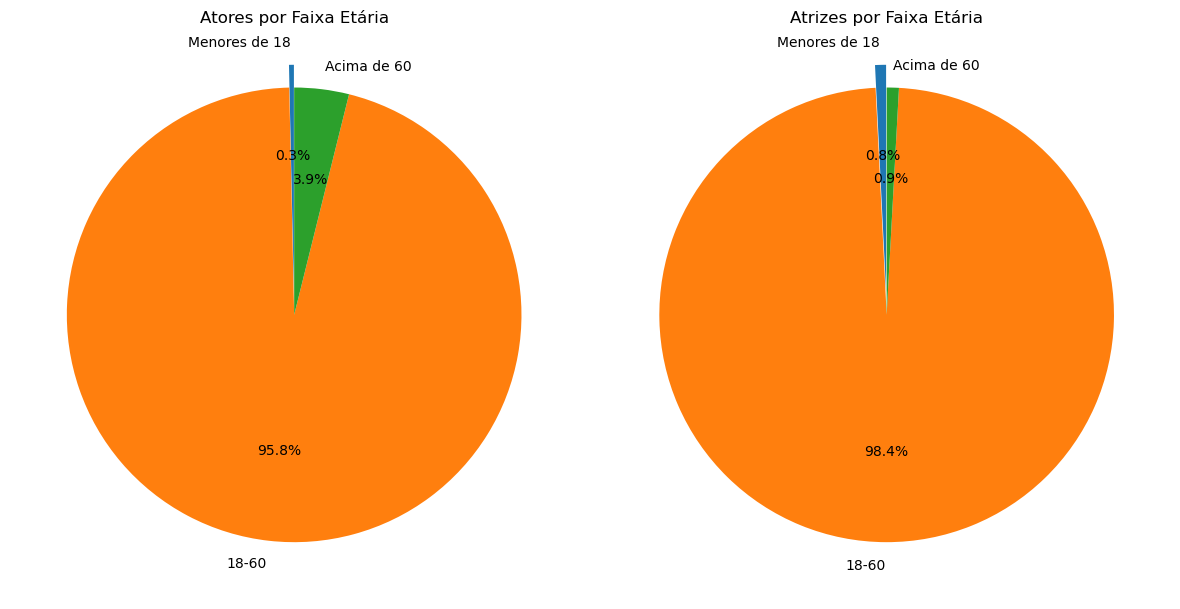

In [62]:
#Calculando o número total de atores e atrizes em cada gênero
total_atores = len(atores)
total_atrizes = len(atrizes)

#Calculando a porcentagem de atores menores de 18 anos
atores_menores_de_18 = atores[atores['Idade Ator 1'] < 18]
porcentagem_atores_menores_de_18 = calcular_porcentagem(total_atores, len(atores_menores_de_18))

#Calculando a porcentagem de atores maiores de 18 anos
atores_maiores_de_18 = atores[(atores['Idade Ator 1'] >= 18) & (atores['Idade Ator 1'] <= 60)]
porcentagem_atores_maiores_de_18 = calcular_porcentagem(total_atores, len(atores_maiores_de_18))

#Calculando a porcentagem de atores acima de 60 anos
atores_acima_de_60 = atores[atores['Idade Ator 1'] > 60]
porcentagem_atores_acima_de_60 = calcular_porcentagem(total_atores, len(atores_acima_de_60))

#Calculando a porcentagem equivalente para atrizes
porcentagem_atrizes_menores_de_18 = calcular_porcentagem(total_atrizes, len(atrizes[atrizes['Idade Ator 2'] < 18]))
porcentagem_atrizes_maiores_de_18 = calcular_porcentagem(total_atrizes, len(atrizes[(atrizes['Idade Ator 2'] >= 18) & (atrizes['Idade Ator 2'] <= 60)]))
porcentagem_atrizes_acima_de_60 = calcular_porcentagem(total_atrizes, len(atrizes[atrizes['Idade Ator 2'] > 60]))


import matplotlib.pyplot as plt

# Dados para o gráfico
idades = ['Menores de 18', '18-60', 'Acima de 60']
porcentagens_atores = [porcentagem_atores_menores_de_18, porcentagem_atores_maiores_de_18, porcentagem_atores_acima_de_60]
porcentagens_atrizes = [porcentagem_atrizes_menores_de_18, porcentagem_atrizes_maiores_de_18, porcentagem_atrizes_acima_de_60]

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário

# Parâmetro explode para destacar a primeira fatia (Menores de 18)
explode = (0.1, 0, 0)

# Criando o gráfico de pizza para atores
plt.subplot(121)  # 1ª linha, 2ª coluna, 1º subplot
plt.pie(porcentagens_atores, labels=idades, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Atores por Faixa Etária')

# Criando o gráfico de pizza para atrizes
plt.subplot(122)  # 1ª linha, 2ª coluna, 2º subplot
plt.pie(porcentagens_atrizes, labels=idades, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Atrizes por Faixa Etária')

# Mostrando o gráfico
plt.tight_layout()
plt.show()

# Apresentação do Gráfico
### Neste gráfico analisamos a média de idades dos atores entre 18 anos e acima de 60 anos. E com esses resultados podemos observar que nesse dataset, temos uma porcentagem considerável de atores acima de 60 anos, referente a tabela. E podemos concluir que em hollywood, os atores com mais idade são chamados para produzir um certa quantidade de filmes, por conta de sua experiência. Mesmo assim, eles não descartam os atores com menor idade, pois eles podem aprimorar a sua carreira com o tempo e adquirir muito conhecimento e habilidade exercendo a carreira. 

# ---------------------------------------------------------------------------------------------------------------

# Identificando problemas e propondo soluções aptas, para uma análise favorável e acertiva. 

# Analisando os dados de "Diferença de Idade em Hollywood" podemos identificar vários problemas que poderiam ser solucionado de algumas formas.

## Problema:
#### Podemos verificar se há algum problema relacionado a dados ausentes ou informações inconsistentes no conjunto de dados ao realizar uma verificação rápida para identificar se há valores ausentes em campos críticos, como "idade do ator 1" e "idade do ator 2".

## Solução:
#### Se for identificado a falta de valores ou inconsistências nos campos críticos, uma solução imediata seria limpar ou preencher os dados ausentes de forma adequada.

## Adotando ações que facilitam a melhoria do dataset:
#### 1. Tratar Dados Ausentes: Verificar campos críticos, como "idade do ator 1" e "idade do ator 2", e tratar os valores ausentes de acordo com a situação. Isso pode envolver a remoção de linhas com informações ausentes ou a imputação dos dados faltantes com base em informações disponíveis.

#### 2. Validação de Dados: Implementar verificações de integridade de dados para garantir que as idades dos atores estejam dentro de faixas etárias razoáveis (por exemplo, não permitir idades negativas).

#### 3. Documentação e Comunicação: Melhorar a documentação do conjunto de dados para fornecer informações claras sobre a estrutura dos dados, as unidades de medida e quaisquer transformações aplicadas aos dados.

#### 4. Atualização Regular: Manter o conjunto de dados atualizado regularmente para refletir as mudanças na indústria cinematográfica. Isso pode ser feito por meio da automação ou de processos de entrada de dados mais eficientes.

#### 5. Análise de Outliers: Realizar uma análise mais profunda dos dados para identificar possíveis outliers ou discrepâncias em outras variáveis, como a diferença de idade entre os atores, que podem indicar situações incomuns que exigem investigação adicional.

#### 6. Visualização de Dados: Utilizar gráficos e visualizações para facilitar a compreensão dos padrões nos dados, como a distribuição de idades dos atores ao longo do tempo ou a representação de diferentes gêneros em diferentes faixas etárias.

## Essas melhorias e ações podem contribuir para tornar o conjunto de dados mais confiável, útil e informativo para análises futuras na área de entretenimento em Hollywood.

# ---------------------------------------------------------------------------------------------------------------

# Breve conclusão sobre essa análise de dados.

## Em resumo, a análise de dados oferece insights valiosos sobre a diferença de idade em Hollywood, mas a qualidade e a integridade dos dados são fundamentais. Ao abordar os problemas identificados e implementar melhorias, o conjunto de dados se tornará mais confiável e útil para análises futuras na indústria do entretenimento, como dito acima. Essas ações não apenas melhoram a qualidade dos dados, mas também aumentam a credibilidade das conclusões e insights derivados deles. E com isso, concluimos a análise de dados desse dataset, realizando o que foi pedido no enunciado do trabalho. 